# Measuring $t_{serial}$ for Speed-Up 

Let's say you parallelized your programm, compiled it and want to calculate speed up. As you know, you will have to measure the execution time of the parallel program, and the execution time of the serial program. 

What happens, if you set the number of threads equals 1 in your parallel program run ? You shoud get a serial program with a small overhead. 

The question arises, wether it is even necessary to write and compile the serial version of the program. Can't you just set threads=1 in your parallel programm, and get the same results for speed-up? 

**Let's find out!** 

The following code will measure the execution time of the parallel fibonacci program with different amounts of threads. To get a more complete picture, we measure the execution time first on the full programm run, and then on the algorithm only (see notebook `compare_timemeasuring_methods`). Then we will measure the execution times of the serial program version. This will allow us to graphically compare the different calculations we get for speed up. 

In [31]:
cd ~/work/Thesis/programs/fibonacci

/home/jovyan/work/Thesis/programs/fibonacci


In [43]:
# of full programm run: measure time
time1 = []
threads = [1,4,8,16,24,32,48,64]
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 4 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 8 >/dev/null
time1.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 16 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 24 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 48 >/dev/null
time1.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 64 >/dev/null
time1.append(timeit_object.best)

# measure serial execution time
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming_serial.o >/dev/null
serial1 = timeit_object.best

In [44]:
# of algorithm only: measure time
import numpy as np
time2 = []
threads = [1,4,8,16,24,32,48,64]
! ./timing.o 1 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 4 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 8 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 16 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 24 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 48 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))
! ./timing.o 64 5 >/dev/null
time2.append(np.genfromtxt('./time.txt'))

# measure serial execution time
! ./timing_serial.o 5 >/dev/null
serial2 = np.genfromtxt('./time.txt')

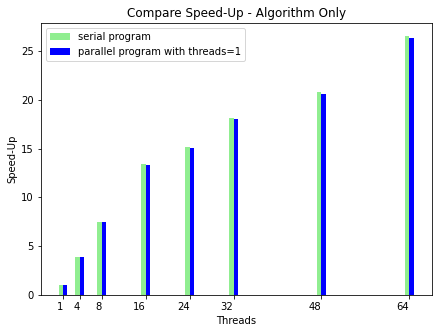

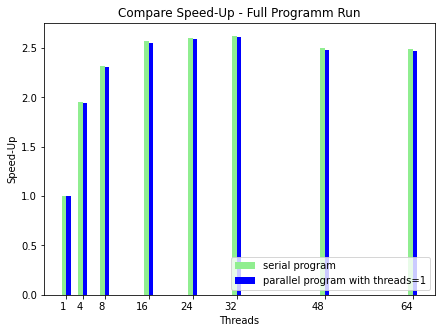

In [46]:
# calculate speed up
speedup1 = np.ones(len(threads))*serial1/np.array(time1)
speedup2 = np.ones(len(threads))*serial2/np.array(time2)
lazyspeedup1 = np.ones(len(threads))*time1[0]/np.array(time1)
lazyspeedup2 = np.ones(len(threads))*time2[0]/np.array(time2)

#plot
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,speedup2,color='lightgreen',label='serial program', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,lazyspeedup2,color='blue',label='parallel program with threads=1',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Speed-Up')
ax.set_xlabel('Threads')
ax.set_title('Compare Speed-Up - Algorithm Only')
ax.legend();
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,speedup1,color='lightgreen',label='serial program', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,lazyspeedup1,color='blue',label='parallel program with threads=1',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Speed-Up')
ax.set_xlabel('Threads')
ax.set_title('Compare Speed-Up - Full Programm Run')
ax.legend(loc="lower right");

What do you think? Is it ok, to just set threads=1 in the parallel programm, when measuring $t_{serial}$ ? Or do you feel we should write and compile a serial version of the program to measure $t_{serial}$?

In the graphics above we can see, that the difference in speed up is small, and rather constant. 

Let's look at the absolute difference:

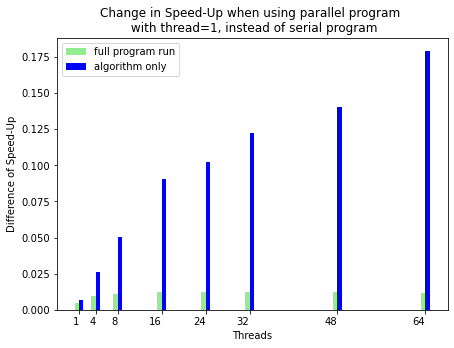

In [47]:
#calculate data
difference1 = speedup1-lazyspeedup1
difference2 = speedup2-lazyspeedup2

#plot
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,difference1,color='lightgreen',label='full program run', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,difference2,color='blue',label='algorithm only',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Difference of Speed-Up')
ax.set_xlabel('Threads')
ax.set_title('Change in Speed-Up when using parallel program \n with thread=1, instead of serial program')
ax.legend(loc="best");

Interesstingliy the effect is different, in dependence of our chosen method for measuring elapsed time. We see almost no change in the resulting speed up, if we measure exection time on the full program run. For the 'algorithm only' version we can see a larger differnce in speed up of up to 1 (depending on the run). 

This does not tell us much, unless we compare it to the total speed up. Let's find out fow much percent the speed up difference takes from the total speed up:

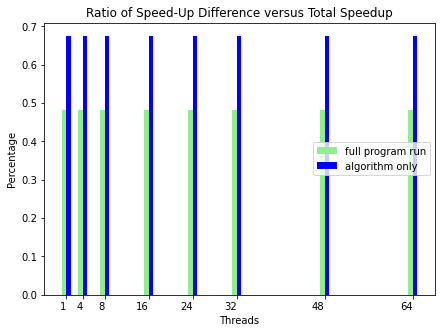

In [48]:
#calculate data
ratio1 = difference1/speedup1*100
ratio2 = difference2/speedup2*100

#plot 2
fig,ax = plt.subplots(figsize=(7,5))
ax.bar(np.array(threads)-0.4,ratio1,color='lightgreen',label='full program run', align='center', width= 0.8)
ax.bar(np.array(threads)+0.4,ratio2,color='blue',label='algorithm only',align='center', width= 0.8)
ax.set_xticks(threads)
ax.set_xticklabels(threads, ha='right')
ax.set_ylabel('Percentage')
ax.set_xlabel('Threads')
ax.set_title('Ratio of Speed-Up Difference versus Total Speedup')
ax.legend(loc="center right");

Looks like we have a constant percentage of speed up difference, which is below 2% (exact value depends on each run).  

For educational purposes it seems to be suffieicent to use the parallel version of a program with thread number set to 1. In a scientific research project, however, it could be more appropriate to use a serial program version. 